In [1]:
# import libarary
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
# delete warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# read dataset
train_path = "/kaggle/input/intel-image-classification/Intel Image Classification/seg_train"
test_path = "/kaggle/input/intel-image-classification/Intel Image Classification/seg_test"

In [4]:
# read image classes
image_classes = os.listdir(train_path)
print(image_classes)

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [5]:
# Visualization image
def plot_images(image_classes):
    plt.figure(figsize=(10,10))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        image_in_folder = os.listdir(image_path)
        
        first_image = image_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(3,2,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

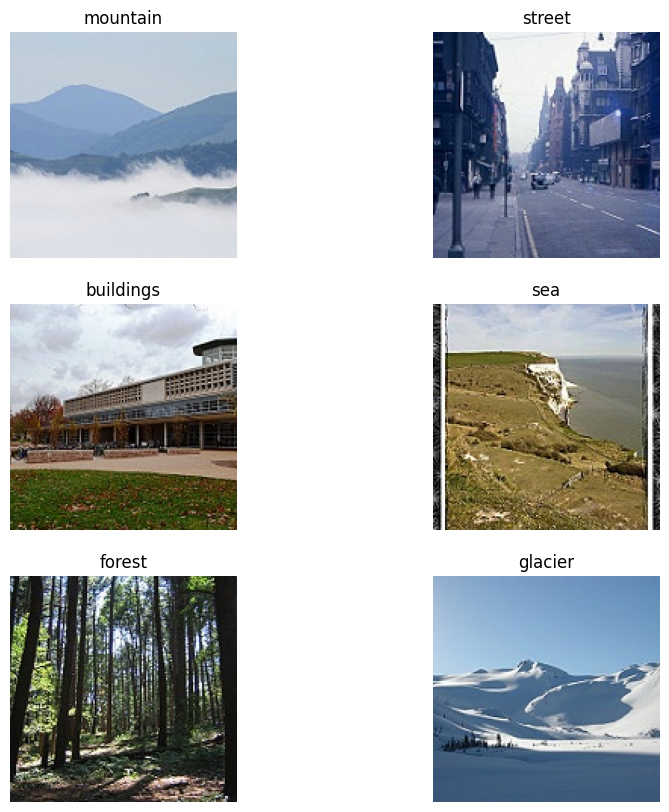

In [6]:
# call function for visualization
plot_images(image_classes)

In [7]:
# image processing
image_generator = ImageDataGenerator(rescale = 1 / 255)

In [8]:
# applay image_generator on train data
train_data = image_generator.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [9]:
# applay image_generator on test data
test_data = image_generator.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [10]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

In [11]:
# summary of vgg16
vgg16 = VGG16()
vgg16.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# print layers of vgg16
vgg16_layer = vgg16.layers
for i in vgg16_layer:
    print(i)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>
<Flatten name=flatten, built=True>
<Dense name=fc1, built=True>
<Dense name=fc2, built=True>
<Dense name=predictions, built=True>


In [13]:
base = VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model = Sequential([
    base,
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(6,activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# model compile
vgg16_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [15]:
# fit model
vgg16_model.fit(train_data, epochs=10,validation_data=test_data)

Epoch 1/10


I0000 00:00:1732066009.955795     116 service.cc:145] XLA service 0x7c23480063f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732066009.955890     116 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732066009.955900     116 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732066047.304586     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


439/439 ━━━━━━━━━━━━━━━━━━━━ 259s 493ms/step - accuracy: 0.3924 - loss: 1.4430 - val_accuracy: 0.6517 - val_loss: 0.9150
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 183s 416ms/step - accuracy: 0.6284 - loss: 0.9430 - val_accuracy: 0.7150 - val_loss: 0.7359
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 184s 418ms/step - accuracy: 0.7165 - loss: 0.7650 - val_accuracy: 0.7670 - val_loss: 0.6343
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 184s 418ms/step - accuracy: 0.7562 - loss: 0.6658 - val_accuracy: 0.7620 - val_loss: 0.6353
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 183s 417ms/step - accuracy: 0.7857 - loss: 0.5972 - val_accuracy: 0.8023 - val_loss: 0.5414
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 183s 416ms/step - accuracy: 0.7960 - loss: 0.5939 - val_accuracy: 0.8163 - val_loss: 0.5232
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 183s 415ms/step - accuracy: 0.8176 - loss: 0.5166 - val_accuracy: 0.8300 - val_loss: 0.5072
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 183s 415ms/step - accuracy: 0.8304 - loss: 0.47

In [16]:
# summary of vgg19
vgg19 = VGG19()
vgg19.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# print layers of vgg19
vgg19_layer = vgg19.layers
for i in vgg19_layer:
    print(i)

<InputLayer name=input_layer_3, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<Conv2D name=block3_conv4, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<Conv2D name=block4_conv4, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<Conv2D name=block5_conv4, built=True>
<MaxPooling2D name=block5_pool, built=True>
<Flatten name=flatten, built=True>
<Dense name=fc1, built=True>
<Dense name=fc2, built=True>
<Dense name=predict

In [18]:
# build model
vgg19_model= Sequential()
for i in range(len(vgg19_layer)-1):
    vgg19_model.add(vgg19_layer[i])

In [19]:
for layers in vgg19_model.layers:
    layers.trainable = False

In [20]:
vgg19_model.add(Dense(6, activation='softmax'))

In [21]:
vgg19_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │        24,58

 Total params: 139,594,822 (532.51 MB)

 Trainable params: 24,582 (96.02 KB)

 Non-trainable params: 139,570,240 (532.42 MB)

In [22]:
# model compile
vgg19_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [23]:
# fit model
vgg19_model.fit(train_data, epochs=10,validation_data=test_data)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.6621 - loss: 0.8637 - val_accuracy: 0.8077 - val_loss: 0.5062
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 197ms/step - accuracy: 0.8169 - loss: 0.4798 - val_accuracy: 0.8327 - val_loss: 0.4518
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.8349 - loss: 0.4422 - val_accuracy: 0.8473 - val_loss: 0.4184
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 201ms/step - accuracy: 0.8437 - loss: 0.4182 - val_accuracy: 0.8513 - val_loss: 0.3919
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 201ms/step - accuracy: 0.8505 - loss: 0.4012 - val_accuracy: 0.8523 - val_loss: 0.3901
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 202ms/step - accuracy: 0.8452 - loss: 0.4180 - val_accuracy: 0.8250 - val_loss: 0.4667
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 202ms/step - accuracy: 0.8659 - loss: 0.3651 - val_accuracy: 0.7843 - val_loss: 0.5861
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 201ms/step - accuracy: 0.8624 - loss: 0

In [24]:
# evaluate model
vgg19_model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.8559 - loss: 0.3875


[0.40445056557655334, 0.847000002861023]